In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Testes estatísticos de significância

- O papel de testes estatísticos é dar evidencias que dois (ou mais) conjuntos de dados não vieram da mesma fonte.

Você rodou 2 versões de um programa em vários dados:

- programa 1 demorou 10.30, 12.08, 9.33, 9.62, 9.88 (segundos) em 5 exemplos
- programa 2 demorou 9.23, 9.84, 8.55, 10.42 em outros 4 exemplos.

Há dois conjuntos de dados. Não existe teste para 2 números, só para 2 ou mais conjuntos de dados

- Dizer que os dois conjuntos de dados são “diferentes” é numa primeira aproximação dizer que esses dados vieram de duas fontes de dados (“populações”) diferentes.

- Ou melhor, dizer que dois conjuntos são **diferentes** é dizer que é bem **improvável** que os dados vieram da **mesma** fonte.


## Erros de amostragem (ou ruídos de amostragem)

Dados retirados (amostrados) de uma mesma fonte podem ter médias diferentes. A diferença é apenas por causa da sorte ou do azar. Isso é chamado de *erro de amostragem*. O nome erro não é um bom nome, pense como *ruído de amostragem*

Vejamos um exemplo. Primeiro vamos gerar um população com 10.000 números aleatórios, com média 100 e desvio padrão 30.

In [3]:
np.random.seed(1234)
pop = np.random.normal(100,30,size=10000)

Vamos gerar um histograma para verificar se os dados se assemelham a uma distribuição normal realmente.

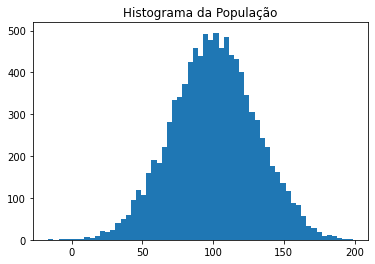

In [5]:
plt.hist(pop, bins='auto')
plt.title("Histograma da População")
plt.show()

Vamos gerar duas amostras vindas dessa população e calcular suas médias.

In [12]:
p1 = np.random.choice(pop, 12)
np.mean(p1)

101.52474152448622

In [8]:
p2 = np.random.choice(pop, 12)
np.mean(p2)

108.3516117635843

Vamos assumir que **p2** são os tempos de execução do seu programa e **p1** são os tempos de execução de um programa conhecido publicado na literatura, e seu mestrado é fazer uma implementação mais rápida do programa **p1**

Voce pode dizer a sua orientadora que vc terminou o mestrado ja que voce criou um programa que é por votla de 15% mais rápido que o estado da arte?

## Teste

Um teste estatístico informa a probabilidade de que os dados sejam tão (ou mais) diferentes quanto eles são tendo em vista que eles vieram da mesma fonte de dados. Esse valor é chamado de *p-valor* ou *p-value*

Se a probabilidade é alta então é provável que a diferença que voce encontrou na média (ou outras medidas - mais abaixo) é apenas devido a sorte (ruído de amostragem).

Se a probabilidade é baixa então voce pode dizer que é pouco provável que os dados vieram de uma mesma fonte, ou 

Se a probabilidade é baixa voce pode dizer que é bem provável que os dados realmente vieram de 2 fontes diferentes.

O termo oficial para dizer que *é bem provável que os dados realmente vieram de 2 fontes diferente* é a *diferença é estatisticamente significante* ou *a diferença é estatisticamente significativa*

In [13]:
stats.ttest_ind(p1,p2)


Ttest_indResult(statistic=-0.5069474461113296, pvalue=0.6172354299153425)

Vamos agora gerar uma amostra de tamanho parecido mas sabidamente com distribuição diferente e rodar novamente o teste contra a nossa amostra p1.

In [19]:
a = np.random.normal(150,30,size=12)
print(a)

[154.70882158 119.53579818 183.54437948 134.86990689 207.3054905
 117.78953978 117.64115419 144.73978265 174.53641178 155.7139643
 149.19330155 145.38378642]


In [20]:
stats.ttest_ind(p1,a)

Ttest_indResult(statistic=-3.9432460844483317, pvalue=0.0006925788114184218)

### Valor usado como decisão: *p < 0.05*

Tradicionalmente, na maioria das Ciências e em particular em Computação usa-se o valor de 0.05 de p-valor para afirmar que a diferença é estatisticamente significante

Na prática, se o p-valor do seu teste der 0.051 você não tem um paper para publicar!!!

Há criticas sobre usar o p-valor como decisão, e veremos isso numa próxima aula, mas tradicionalmente essa é a prática.

## Resumo: teste estatísticos

- Você tem dois conjuntos de dados A e B.

- Assuma que eles vieram de uma mesma fonte de dados F (cujos detalhes você não sabe). Isso é chamado de hipótese nula.

- Calcule a probabilidade que 2 amostras dessa fonte F tenham as médias tão diferentes quanto as médias de A e B. Essa probabilidade é chamada de p-valor

- Se o p-valor é alto, então é mais provável que A e B venham dessa mesma fonte e a diferença nas médias é apenas devido a “sorte”

- Se o p-valor for baixo então há baixa chance que dados tão diferentes quanto os de A e B tenham vindo desta mesma fonte F. Se eles vieram de “fontes diferentes” então a diferença entre eles não é apenas por causa da sorte.

- Em Ciência em geral, assume-se que p-valores menores que 0.05 (ou 95% de confiança) são evidência suficiente que os dados não vieram de uma mesma fonte.

- Assim, se o p-valor é baixo (< 0.05<0.05), você tem alguma evidência que os conjuntos de dados são realmente diferentes (não vieram da mesma fonte) e diz-se que a diferença é **estatisticamente significante** (com 95% de confiança)

- Se o p-valor é alto (> 0.05>0.05) não há nada que você pode dizer. Você **não** mostrou que os dados são **semelhantes** ou **iguais**. Você apenas não conseguiu mostrar que eles são diferentes!!!

- Assim normalmente você quer um p-valor baixo

- O papel de testes estatísticos é dar evidencias que a diferença entre a média de dois (ou mais) *conjuntos* de dados não é devido apenas a sorte (ou ao ruído de amostragem) 